# Data Analyst NanoDegree Project 1
## Exploring Weather Trends

# SQL code used to collect data

#### SELECT cd.*, gd.avg_temp global_avg_temp
#### From city_data cd
#### JOIN global_data gd
#### ON cd.year = gd.year
#### WHERE city = 'Cairo'



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sys.version

'3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]'

In [ ]:
!conda install nbconvert

In [ ]:
!pip install nbconvert

In [7]:
joined_data = pd.read_csv('D:\Python\Data Analyst\Weather trends\joined results.csv')
joined_data.head()

,year,city,country,local_avg_temp,global_avg_temp
0,1808,Cairo,Egypt,17.11,7.63
1,1809,Cairo,Egypt,19.87,7.08
2,1810,Cairo,Egypt,19.93,6.92
3,1811,Cairo,Egypt,20.00,6.86
4,1812,Cairo,Egypt,19.93,7.05


In [8]:
joined_data.drop(columns = ['city','country'], inplace=True)

In [9]:
joined_data.head()

,year,local_avg_temp,global_avg_temp
0,1808,17.11,7.63
1,1809,19.87,7.08
2,1810,19.93,6.92
3,1811,20.00,6.86
4,1812,19.93,7.05


In [10]:
joined_data.set_index(joined_data['year'],inplace = True)
joined_data.drop(columns = 'year', inplace = True)
joined_data.head()

,local_avg_temp,global_avg_temp
year,,
1808,17.11,7.63
1809,19.87,7.08
1810,19.93,6.92
1811,20.00,6.86
1812,19.93,7.05


[Text(0, 0.5, 'Temperature °C'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'local and global average Temperature comparison')]

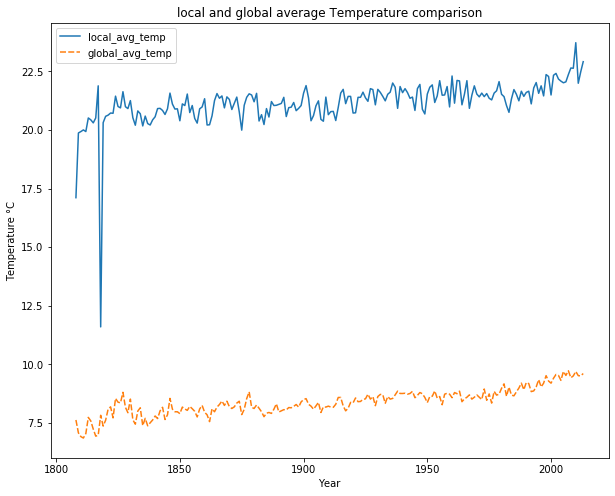

In [19]:
plt.figure(1,(10,8))

sns.lineplot(data = joined_data).set(xlabel='Year', ylabel='Temperature °C', 
                                     title='local and global average Temperature comparison')


In [20]:
#creating 5 year  moving average
joined_data['local_MA_5'] = joined_data['local_avg_temp'].rolling(window=5).mean()
joined_data['global_MA_5'] = joined_data['global_avg_temp'].rolling(window=5).mean()
joined_data.head(10)

,local_avg_temp,global_avg_temp,local_MA_5,global_MA_5
year,,,,
1808,17.11,7.63,NaN,NaN
1809,19.87,7.08,NaN,NaN
1810,19.93,6.92,NaN,NaN
1811,20.00,6.86,NaN,NaN
1812,19.93,7.05,19.368,7.108
1813,20.51,7.74,20.048,7.130
1814,20.43,7.59,20.160,7.232
1815,20.30,7.24,20.234,7.296
1816,20.51,6.94,20.336,7.312


[Text(0, 0.5, 'Temperature °C'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'local and global 5 year moving average Temperature comparison')]

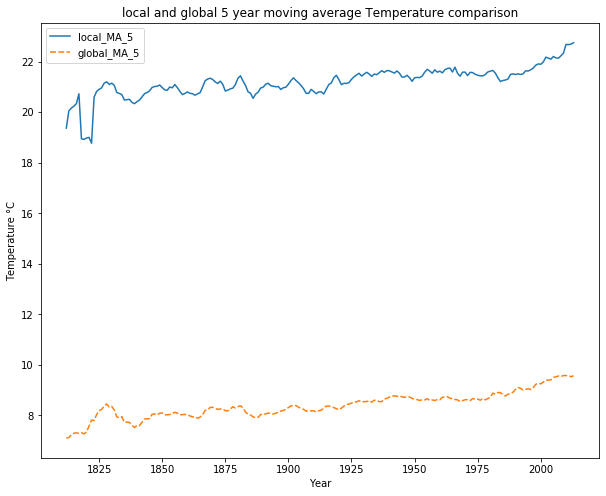

In [21]:
plt.figure(1,(10,8))

sns.lineplot(data = joined_data[['local_MA_5', 'global_MA_5']]).set(xlabel='Year', ylabel='Temperature °C', 
                                     title='local and global 5 year moving average Temperature comparison')

In [139]:
print('The mean local temperature is', np.round(joined_data['local_avg_temp'].mean(), 2),'C' )
print('The mean global temperature is',np.round(joined_data['global_avg_temp'].mean(), 2),'C' )

The mean local temperature is 21.17 C
The mean global temperature is 8.4 C


In [22]:
#creating 10 year moving average
joined_data['local_MA_10'] = joined_data['local_avg_temp'].rolling(window=10).mean()
joined_data['global_MA_10'] = joined_data['global_avg_temp'].rolling(window=10).mean()
joined_data.head(15)

,local_avg_temp,global_avg_temp,local_MA_5,global_MA_5,local_MA_10,global_MA_10
year,,,,,,
1808,17.11,7.63,NaN,NaN,NaN,NaN
1809,19.87,7.08,NaN,NaN,NaN,NaN
1810,19.93,6.92,NaN,NaN,NaN,NaN
1811,20.00,6.86,NaN,NaN,NaN,NaN
1812,19.93,7.05,19.368,7.108,NaN,NaN
1813,20.51,7.74,20.048,7.130,NaN,NaN
1814,20.43,7.59,20.160,7.232,NaN,NaN
1815,20.30,7.24,20.234,7.296,NaN,NaN
1816,20.51,6.94,20.336,7.312,NaN,NaN


[Text(0, 0.5, 'Temperature °C'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'local and global 10 year moving average Temperature comparison')]

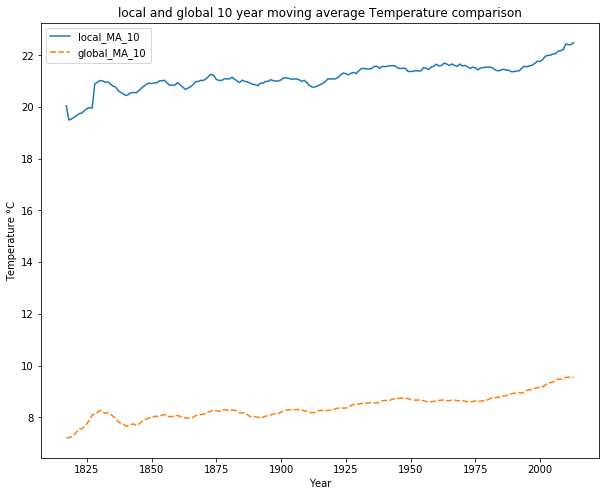

In [23]:
plt.figure(1,(10,8))

sns.lineplot(data = joined_data[['local_MA_10', 'global_MA_10']]).set(xlabel='Year', ylabel='Temperature °C', 
                                     title='local and global 10 year moving average Temperature comparison')

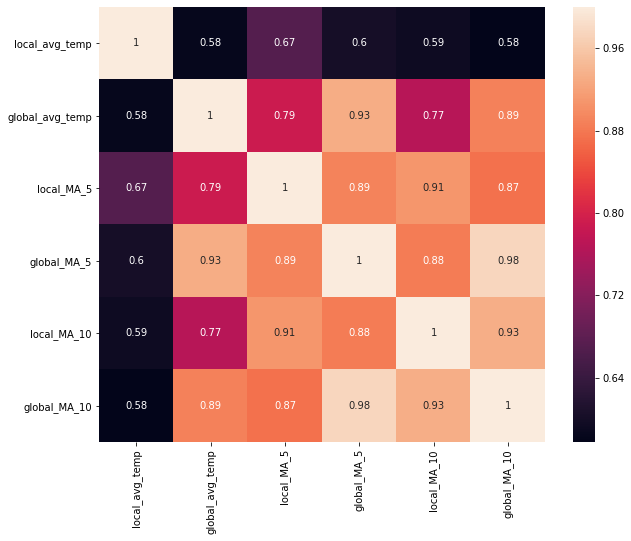

In [24]:
#creating correlation heatmap between the local temperature 5 year moving average 
#and the global temperature 5 year moving average
plt.figure(1,(10,8))
corr = joined_data.corr()
heat_map = sns.heatmap(data=corr,annot = True)

### 1.Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

A: Temperature in my city is hotter on average than the global average by quite a large margin and the difference has always been consistent.

### How do the changes in your city’s temperatures over time compare to the changes in the global average?

A: The changes in my city's temperature and the global average are almost the same (see above or below for the correlation coefficient).

### What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

A: The world is defiantly getting hotter (despite the climate change skeptics' efforts) and has been for the last few hundred years.


### Is there any differences in temperature's variation between your city and the global average?

A: My city's temperature on average has more variance than the global average.

### What's the correlation coefficient?

A:  the correlation coefficient between the local and global average temperature stands at *0.58*.
However, the correlation coefficient between the rolling average of 5 years is higher standing at *0.89*.
Subsequently, the correlation coefficient between the rolling 10 years average stands at a maximum of *0.93*.

One can only draw the conclusion that with more moving average theresholds , the correlation coefficient grows larger and the correlation becomes more apparent.
